Question 1:  In this assignment, we want to evaluate how Disney performed as an investment between October 2008 and September 2013 and how risky it is. To do that we need to regresse monthly raw returns on Disney against returns on the S&P 500 over that period.

- Download the historical data of Disney and S&P 500 over that period
- Calculate the returns of Disney and the S&P 500 index.
- Using Python, plot the monthly returns on Disney against returns on the S&P 500 index from October 2008 to September 2013.
- Find the regression line for Disney return on S&P 500 index What is the slop of the regression? What is the meaning of this value? 
- What is the Intercept of the Regression? What is the meaning of this value? Does Disney’s stock perform better or worse than expected? Why?
- Find the annualized excess return? What is the R squared of the regression?
- What is the significance of this value? What is Standard Error of Beta Estimate? What is the significance of this value?

In [116]:
import pandas as pd
from pandas_datareader import data, wb
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
start = datetime.datetime(2008, 10, 1)
end = datetime.datetime(2013, 9, 1)

data = data.DataReader(['SPY',],  'google', start, end)

In [118]:
data =data['Open']
data.head()

,DIS,SPY
Date,,
2008-10-01,30.30,115.27
2008-10-02,30.42,114.95
2008-10-03,30.17,112.86
2008-10-06,28.84,107.15
2008-10-07,27.81,106.84


In [126]:
dataM = data.resample('M').mean()
dataM.tail()

,DIS,SPY
Date,,
2013-04-30,59.968636,156.878182
2013-05-31,65.757727,164.000909
2013-06-30,63.637500,162.417000
2013-07-31,64.906364,166.682727
2013-08-31,63.255455,167.297727


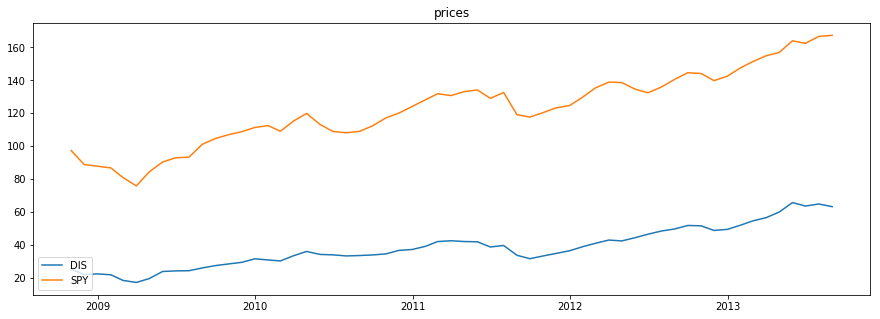

In [127]:
#data =dataM['Open']
plt.figure(figsize=(15,5));
plt.plot(dataM.index,dataM);
plt.legend(dataM.columns.values,loc=3);
plt.title("prices");

In [130]:
dataM.head()

,DIS,SPY
Date,,
2008-10-31,25.357391,97.310000
2008-11-30,22.002632,88.847368
2008-12-31,22.454545,87.840909
2009-01-31,21.890000,86.791000
2009-02-28,18.476316,80.946316


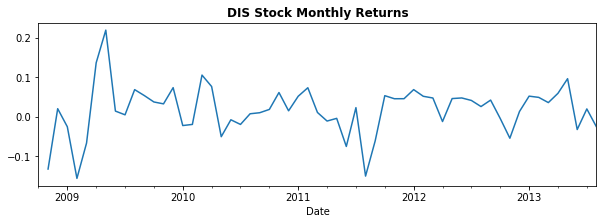

In [134]:
fig = plt.figure()
fig.set_size_inches(10,3)
dataM["DIS"].pct_change().plot()
plt.title(u"DIS Stock Monthly Returns", weight='bold');

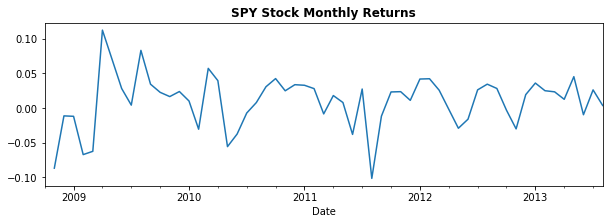

In [135]:
fig = plt.figure()
fig.set_size_inches(10,3)
dataM["SPY"].pct_change().plot()
plt.title(u"SPY Stock Monthly Returns", weight='bold');

In [146]:
returns = pd.DataFrame()
tickers = ['DIS', 'SPY']

for tick in tickers:
    returns[tick+' Return'] = dataM[tick].pct_change()
returns.head()

,DIS Return,SPY Return
Date,,
2008-10-31,NaN,NaN
2008-11-30,-0.132299,-0.086966
2008-12-31,0.020539,-0.011328
2009-01-31,-0.025142,-0.011952
2009-02-28,-0.155947,-0.067342


In [147]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

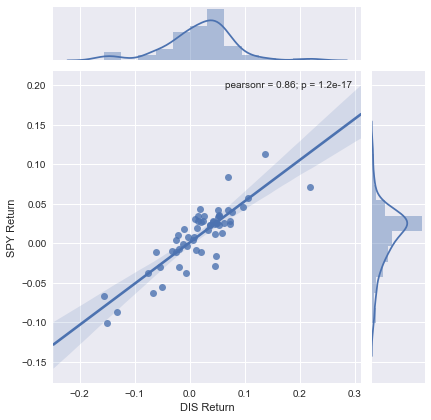

In [152]:
sns.jointplot(x="DIS Return", y="SPY Return", data=returns, kind="reg");

In [167]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [169]:
filtered_data = returns[~np.isnan(returns["SPY Return"])] #removes rows with NaN in them
filtered_data.head(3)

,DIS Return,SPY Return
Date,,
2008-11-30,-0.132299,-0.086966
2008-12-31,0.020539,-0.011328
2009-01-31,-0.025142,-0.011952


In [171]:
npMatrix = np.matrix(filtered_data)
X, Y = npMatrix[:,0], npMatrix[:,1]
mdl = LinearRegression().fit(X,Y) # either this or the next line
#mdl = LinearRegression().fit(filtered_data[['x']],filtered_data.y)
m = mdl.coef_[0]
b = mdl.intercept_
print( "formula: y = {0}x + {1}".format(m, b) )# following slope intercept form

formula: y = [ 0.52126295]x + [ 0.00081352]


In [173]:
import statsmodels.api as sm
res = sm.OLS(Y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     170.4
Date:                Thu, 08 Jun 2017   Prob (F-statistic):           9.02e-19
Time:                        22:35:37   Log-Likelihood:                 145.26
No. Observations:                  58   AIC:                            -288.5
Df Residuals:                      57   BIC:                            -286.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5247      0.040     13.054      0.0

In [175]:
print('Parameters: ', res.params)
print('R2: ', res.rsquared)

Parameters:  [ 0.52468377]
R2:  0.749356664176


Find the regression line for Disney return on S&P 500 index What is the slop of the regression? What is the meaning of this value?
What is the Intercept of the Regression? What is the meaning of this value? Does Disney’s stock perform better or worse than expected? Why?
Find the annualized excess return? What is the R squared of the regression?
What is the significance of this value? What is Standard Error of Beta Estimate? What is the significance of this value?

In [ ]:
- Slope of the regression is the relationship of Disneys Monthly Returns to SP500 Returns
- the intercept is the expected value of SPY when Disneys Return is zero.
- 0.749 is the R2, or how close the data fits to the regression line or how inter related DIS or SPY are
- 0.040 is the Standard  Error is a measure of  accuracy 